# Actividad3_1_Atipicos
## Luis Alberto Mirón Toruño 

In [2]:
# Librerías
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ventas = pd.read_csv("Ventas_totales_NotNA.csv")
ventas.head(6)

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1.050314e+06,340777.3882,4397543.671,7.723718e+05,1838507.096,2806660.309
1,1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1.026167e+06,328288.6951,4053283.771,6.722905e+05,1257661.903,2354084.901
2,2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1.075526e+06,353335.1548,4354197.611,6.676967e+05,1305674.917,2266189.277
3,3,01/04/2017,29134.3,27045.9,29134272.22,28827479.49,306792.733,29134272.22,1.031263e+07,7454251.800,...,8211244.093,1.132396e+06,3257140.159,3006158.760,1.037213e+06,359694.4537,4355706.646,8.389482e+05,1535726.345,2146755.887
4,4,01/05/2017,27969.0,25631.9,27969004.68,27569311.41,399693.262,27969004.68,1.014761e+07,6735747.319,...,7651058.084,1.033082e+06,3232635.767,2799142.123,9.826512e+05,336568.0085,4206101.605,9.158951e+05,1824462.036,2117971.483
5,5,01/06/2017,29132.7,26365.4,29132712.74,28763865.42,368847.326,29132712.74,1.056549e+07,7337456.597,...,7911936.245,1.083494e+06,3322049.564,2883228.762,9.522033e+05,345114.1199,4277889.539,1.001572e+06,1893542.062,2358093.345


### Comprobación de nulos

In [4]:
ventas.isna().sum()
# Notamos que el archivo no contiene valores nulos

Unnamed: 0                             0
indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros           

## Identificación y Sustitución de Outliers

### Columna: ventas_precios_corrientes

### Método de desviación estándar 

In [5]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=ventas["ventas_precios_corrientes"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers= ventas[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

Limite superior permitido 214312.62398613384
Limite inferior permitido -69832.22706305691


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


### Método rango intercuartílico 

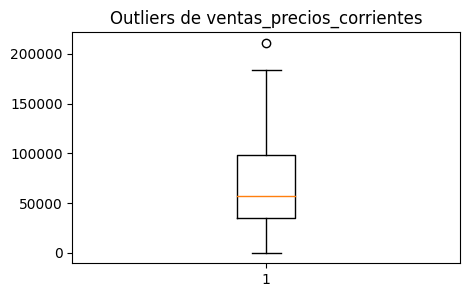

In [6]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ventas["ventas_precios_corrientes"]) 
plt.title("Outliers de ventas_precios_corrientes")
plt.show() #dibujamos el diagrama

In [7]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=ventas["ventas_precios_corrientes"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 192319.35000000003
Limite inferior permitido -59178.650000000016


In [8]:
#Encontramos Ouliers
outliers_iqr= ventas[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,01/07/2020,211140.7,50791.4,81140696.22,76413721.76,4726974.457,81140696.22,24935747.29,22143208.63,...,23393038.41,2630487.791,9592798.115,8463266.123,2712593.828,518942.5376,11217153.19,2502616.619,6125265.839,5935993.913


In [9]:
#Obtenemos datos limpios
ventas_clean_iqr_1= ventas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

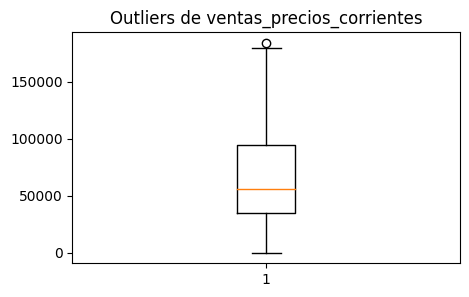

In [10]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ventas_clean_iqr_1["ventas_precios_corrientes"]) 
plt.title("Outliers de ventas_precios_corrientes")
plt.show() #dibujamos el diagrama

# Columna: venta_precios_constantes 

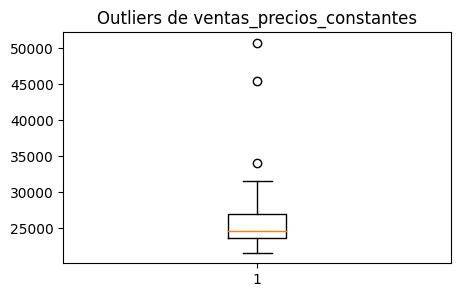

In [11]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ventas["ventas_precios_constantes"]) 
plt.title("Outliers de ventas_precios_constantes")
plt.show() #dibujamos el diagrama

In [12]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=ventas["ventas_precios_constantes"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers= ventas[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

Limite superior permitido 40022.90598479884
Limite inferior permitido 12104.484784431932


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4726974.457,8.114070e+07,24935747.29,22143208.63,...,23393038.41,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,11217153.19,2502616.619,6.125266e+06,5.935994e+06
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,46962602.22,46053650.13,...,37505172.62,4860317.680,1.610477e+07,1.740849e+07,6138441.197,1.401929e+06,21330213.29,3782646.219,1.218755e+07,1.343307e+07


### Método rango intercuartílico 

In [13]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=ventas["ventas_precios_constantes"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= ventas[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

Limite superior permitido 31938.75
Limite inferior permitido 18759.949999999997


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
11,11,01/12/2017,40766.3,34084.5,4.076632e+07,4.032029e+07,4.460368e+05,4.076632e+07,13710305.37,11070098.74,...,9.667850e+06,1346130.813,3.684165e+06,3.674954e+06,1398334.689,4.762751e+05,5.239243e+06,1278355.018,2.857323e+06,4.502834e+06
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4.726974e+06,8.114070e+07,24935747.29,22143208.63,...,2.339304e+07,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,1.121715e+07,2502616.619,6.125266e+06,5.935994e+06
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,46962602.22,46053650.13,...,3.750517e+07,4860317.680,1.610477e+07,1.740849e+07,6138441.197,1.401929e+06,2.133021e+07,3782646.219,1.218755e+07,1.343307e+07


In [14]:
#Obtenemos datos limpios
ventas_clean_iqr_2= ventas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

### Columna salon_ventas

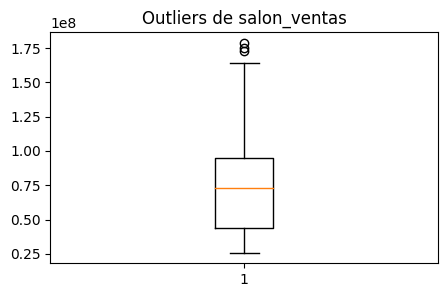

In [15]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ventas["salon_ventas"]) 
plt.title("Outliers de salon_ventas")
plt.show() #dibujamos el diagrama

### Rango intercuartílico 

In [16]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=ventas["salon_ventas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= ventas[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

Limite superior permitido 170440082.58499998
Limite inferior permitido -32001350.254999995


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [17]:
# Obtenemos valores sin outliers 
ventas_clean_iqr_3= ventas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

### Columna tarjetas_debito 

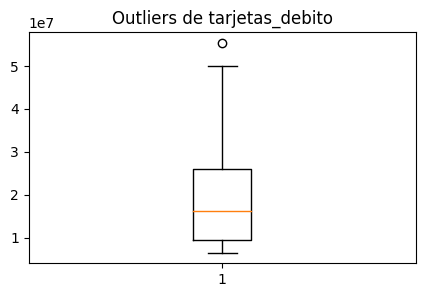

In [18]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ventas["tarjetas_debito"]) 
plt.title("Outliers de tarjetas_debito")
plt.show() #dibujamos el diagrama

In [19]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=ventas["tarjetas_debito"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers= ventas[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

Limite superior permitido 58211843.368987516
Limite inferior permitido -18305562.619110595


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [20]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=ventas["tarjetas_debito"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= ventas[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

Limite superior permitido 50952216.5835
Limite inferior permitido -15349161.052499998


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [21]:
# Obtenemos valores limpios
ventas_clean_iqr_4= ventas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

### Columna tarjetas_credito 

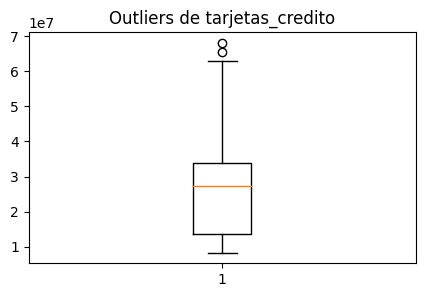

In [22]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ventas["tarjetas_credito"]) 
plt.title("Outliers de tarjetas_credito")
plt.show() #dibujamos el diagrama

In [23]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=ventas["tarjetas_credito"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers= ventas[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

Limite superior permitido 72306050.90550154
Limite inferior permitido -17782060.257563073


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [24]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=ventas["tarjetas_credito"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= ventas[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

Limite superior permitido 63856184.05500001
Limite inferior permitido -16515482.225


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [25]:
# Obtenemos valores limpios
ventas_clean_iqr_5= ventas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

### Columna subtotal_ventas_alimentos_bebidas

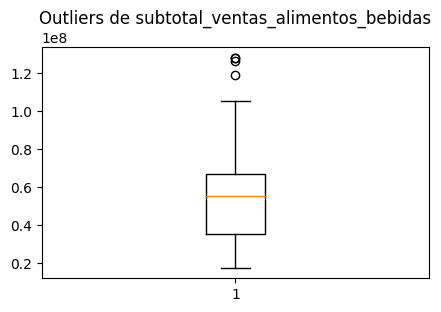

In [26]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ventas["subtotal_ventas_alimentos_bebidas"]) 
plt.title("Outliers de subtotal_ventas_alimentos_bebidas")
plt.show() #dibujamos el diagrama

In [27]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=ventas["subtotal_ventas_alimentos_bebidas"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers= ventas[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

Limite superior permitido 143021333.08929762
Limite inferior permitido -32426087.265605308


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [28]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=ventas["subtotal_ventas_alimentos_bebidas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= ventas[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

Limite superior permitido 114548006.925
Limite inferior permitido -11790048.954999998


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,4634783.40
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [29]:
# Obtenemos valores limpios
ventas_clean_iqr_6= ventas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

# Columna bebidas 

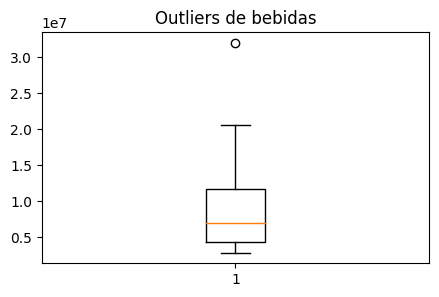

In [30]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ventas["bebidas"]) 
plt.title("Outliers de bebidas")
plt.show() #dibujamos el diagrama

In [31]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=ventas["bebidas"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers= ventas[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

Limite superior permitido 26484419.878895137
Limite inferior permitido -8726956.89280283


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [32]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=ventas["bebidas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= ventas[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

Limite superior permitido 22825184.4515
Limite inferior permitido -6724636.7525


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [33]:
# Obtenemos valores limpios
ventas_clean_iqr_7= ventas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

### Columna panadería 

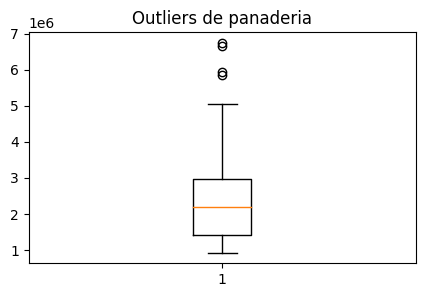

In [34]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ventas["panaderia"]) 
plt.title("Outliers de panaderia")
plt.show() #dibujamos el diagrama

In [35]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=ventas["panaderia"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers= ventas[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

Limite superior permitido 6907606.7495621145
Limite inferior permitido -1821126.3505928833


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [36]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=ventas["panaderia"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= ventas[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

Limite superior permitido 5314390.465
Limite inferior permitido -928804.111


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,4634783.40
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [37]:
# Obtenemos valores limpios
ventas_clean_iqr_8= ventas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

### Columna lacteos

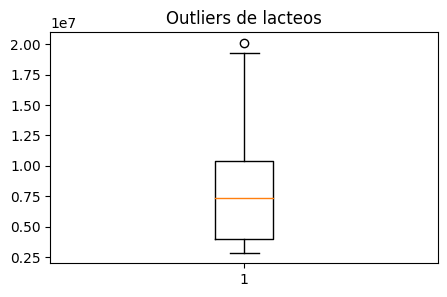

In [38]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ventas["lacteos"]) 
plt.title("Outliers de lacteos")
plt.show() #dibujamos el diagrama

In [39]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=ventas["lacteos"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers= ventas[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

Limite superior permitido 22238247.70714262
Limite inferior permitido -5857302.556158006


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [40]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=ventas["lacteos"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= ventas[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

Limite superior permitido 19940661.0455
Limite inferior permitido -5569362.3025


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [41]:
# Obtenemos valores limpios
ventas_clean_iqr_9= ventas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

### Columna alimentos_preparados_rotiseria

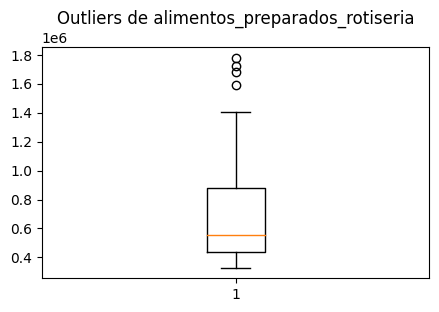

In [42]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ventas["alimentos_preparados_rotiseria"]) 
plt.title("Outliers de alimentos_preparados_rotiseria")
plt.show() #dibujamos el diagrama

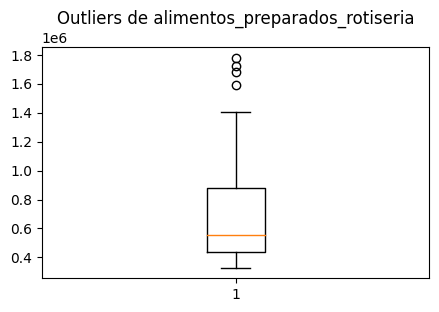

In [43]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ventas["alimentos_preparados_rotiseria"]) 
plt.title("Outliers de alimentos_preparados_rotiseria")
plt.show() #dibujamos el diagrama

In [44]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=ventas["alimentos_preparados_rotiseria"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers= ventas[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

Limite superior permitido 1796842.6297867633
Limite inferior permitido -419478.17045137857


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [45]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=ventas["alimentos_preparados_rotiseria"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= ventas[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

Limite superior permitido 1546751.13875
Limite inferior permitido -227313.79444999993


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,4634783.40
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [46]:
# Obtenemos valores limpios
ventas_clean_iqr_10= ventas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

### Columna: indumentaria_calzado_textiles_hogar

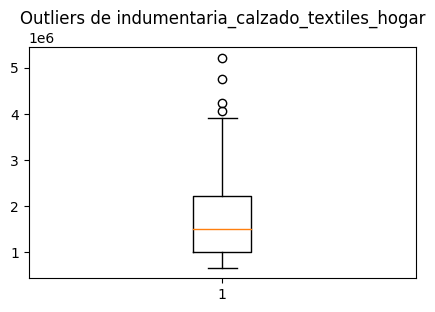

In [47]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ventas["indumentaria_calzado_textiles_hogar"]) 
plt.title("Outliers de indumentaria_calzado_textiles_hogar")
plt.show() #dibujamos el diagrama

In [48]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=ventas["indumentaria_calzado_textiles_hogar"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers= ventas[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

Limite superior permitido 5187996.400324186
Limite inferior permitido -1458130.2991364938


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [49]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=ventas["indumentaria_calzado_textiles_hogar"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= ventas[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

Limite superior permitido 4028365.028
Limite inferior permitido -800338.516


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
54,54,01/07/2021,125658.6,24779.5,125658552.5,120904098.3,4754454.215,125658552.5,37973547.56,37146178.90,...,34683058.37,4322896.980,14292062.10,15147184.63,3985101.607,1052052.786,15724007.71,4051857.507,9222787.62,9.421771e+06
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,1.666512e+07
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,1.191048e+07
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,1.234998e+07


In [50]:
# Obtenemos valores limpios
ventas_clean_iqr_11= ventas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

### Columna: Otros 

In [51]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=ventas["otros"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers= ventas[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

Limite superior permitido 15400188.083717234
Limite inferior permitido -3988638.8826710805


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [55]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=ventas["otros"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= ventas[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

Limite superior permitido 13169100.024999999
Limite inferior permitido -2599893.999


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,1.266927e+07,16665123.15
60,60,01/01/2022,154517.1,45463.4,154517094.2,149697614.6,4819479.554,154517094.2,46962602.22,46053650.13,...,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219,1.218755e+07,13433071.98
61,61,01/02/2022,152202.6,23802.1,152202573.4,148406529.3,3796044.076,152202573.4,46290956.21,45283575.25,...,38209790.62,5045920.421,16139816.50,18260738.31,6436027.691,1370639.589,20305446.86,3782646.219,9.189746e+06,13301387.17


In [56]:
# Obtenemos valores limpios
ventas_clean_iqr_12= ventas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

# Obtenemos los archivos sin outliers 

In [57]:
ventas_clean_iqr_1.to_csv("Precios_corrientes.csv")
ventas_clean_iqr_2.to_csv("Precios_constantes.csv")
ventas_clean_iqr_3.to_csv("salon_ventas.csv")
ventas_clean_iqr_4.to_csv("tarjetas_debito.csv")
ventas_clean_iqr_5.to_csv("tarjetas_credito.csv")
ventas_clean_iqr_6.to_csv("ventas_alimentos_bebidas.csv")
ventas_clean_iqr_7.to_csv("bebidas.csv")
ventas_clean_iqr_8.to_csv("panaderia.csv")
ventas_clean_iqr_9.to_csv("lacteos.csv")
ventas_clean_iqr_10.to_csv("preparados_rosticeria.csv")
ventas_clean_iqr_11.to_csv("indumentaria_calzado_textiles_hogar.csv")
ventas_clean_iqr_12.to_csv("otros.csv")